(100,) (100,)


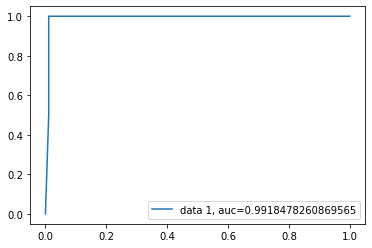

In [10]:
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics

y_true = np.array(y)
y_probas = np.array(anomaly_score)
print(y_true.shape, y_probas.shape)

fpr, tpr, _ = metrics.roc_curve(y_true,  y_probas)
auc = metrics.roc_auc_score(y_true, y_probas)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [8]:
import time

In [10]:
from tools.HierarchicalClustering import HierarchicalClustering

features = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]
for feature in ['all','real','reactive','harmonic']:
    AUC_Scores = []
    times = []

    print('----------')
    print('Features used: ' + feature)
    for distance_threshold in features:
        hic = HierarchicalClustering(feature=feature, suppress_progress=True)
        hic.distance_threshold = distance_threshold
        
        start = time.time()
        anomaly_score, y = hic.cluster_all()
        end = time.time()
        
        sc = hic.auc_score(anomaly_score, y)
        AUC_Scores.append(sc)
        print('AUC: ' + str(distance_threshold) + '  ' + str(sc) )
        times.append(end - start)
        print(f"Runtime of the program is {end - start}")
    
    print('*********')
    print(AUC_Scores)
    print(max(AUC_Scores))
    print(times)
    print('*********')
    print('----------')

----------
Features used: all
AUC: 0.5  0.5222222222222221
Runtime of the program is 1.780268907546997
AUC: 1  0.7755555555555556
Runtime of the program is 1.785224199295044
AUC: 1.5  0.9266666666666666
Runtime of the program is 1.841076374053955
AUC: 2  0.9577777777777778
Runtime of the program is 1.8241500854492188
AUC: 2.5  0.9622222222222222
Runtime of the program is 1.8740198612213135
AUC: 3  0.98
Runtime of the program is 1.67153000831604
AUC: 3.5  0.9844444444444445
Runtime of the program is 1.9188358783721924
AUC: 4  0.9844444444444445
Runtime of the program is 1.6904487609863281
AUC: 4.5  0.9844444444444445
Runtime of the program is 1.7562682628631592
AUC: 5  0.9844444444444445
Runtime of the program is 1.7612533569335938
AUC: 5.5  0.9833333333333334
Runtime of the program is 1.7682359218597412
AUC: 6  0.981111111111111
Runtime of the program is 1.9040908813476562
AUC: 6.5  0.981111111111111
Runtime of the program is 1.9208614826202393
AUC: 7  0.981111111111111
Runtime of the 

KeyboardInterrupt: 

0% complete
20% complete
40% complete
60% complete
80% complete
100% complete
(100,) (100,)
----------
Features used: all
0.9864130434782609
----------
0% complete
20% complete
40% complete
60% complete
80% complete
100% complete
(100,) (100,)
----------
Features used: real
0.9864130434782609
----------
0% complete
20% complete
40% complete
60% complete
80% complete
100% complete
(100,) (100,)
----------
Features used: reactive
0.9864130434782609
----------
0% complete
20% complete
40% complete
60% complete
80% complete
100% complete
(100,) (100,)
----------
Features used: harmonic
0.9945652173913043
----------


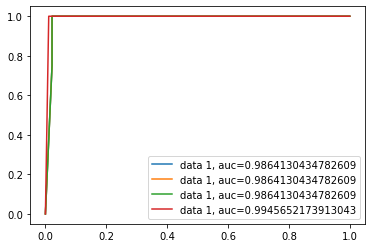

In [12]:
# 4.2
from tools.HierarchicalClustering import HierarchicalClustering
for feature, distance_threshold in [('all', 5),('real', 2.5),('reactive', 4.5),('harmonic', 2.5)]:
    hic = HierarchicalClustering(feature=feature)
    hic.distance_threshold = distance_threshold
    anomaly_score, y = hic.cluster_all()
    
    y_true = np.array(y)
    y_probas = np.array(anomaly_score)
    print(y_true.shape, y_probas.shape)

    fpr, tpr, _ = metrics.roc_curve(y_true,  y_probas)
    auc = metrics.roc_auc_score(y_true, y_probas)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    
    
    print('----------')
    print('Features used: ' + feature)
    print(hic.auc_score(anomaly_score, y))
    print('----------')
plt.show()

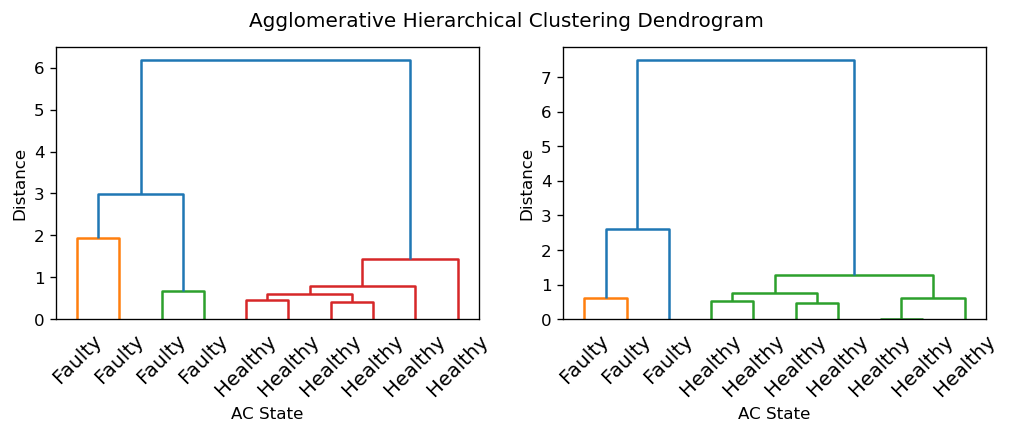

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

def plot_dendrogram(row):
    x_row, y_row = hic.get_X_Y(row)
    linked = linkage(x_row, hic.linkage)
    labelList = ['Faulty' if x else 'Healthy' for x in y_row]
    plt1 = dendrogram(linked,
                orientation='top',
                leaf_rotation=45,
                labels=labelList,
                distance_sort='descending',
                show_leaf_counts=True,
                color_threshold=hic.distance_threshold)
    return plt1

plt.figure(figsize=(10, 3), dpi=120)
plt.suptitle('Agglomerative Hierarchical Clustering Dendrogram')

plt.subplot(1, 2, 1)
plt.xlabel('AC State')
plt.ylabel('Distance')
plt1 = plot_dendrogram(0)


plt.subplot(1, 2, 2)
plt.xlabel('AC State')
plt.ylabel('Distance')
plt2 = plot_dendrogram(10)

In [3]:
# 4.3
from tools.KNN import KNN
for feature in ['all','real','reactive','harmonic']:
    knn = KNN(feature=feature)
    knn.cluster_all()
    print('----------')
    print('Features used: ' + feature)
    knn.get_scores()
    print('----------')

0% complete
25% complete
50% complete
75% complete
100% complete
----------
Features used: all
AUC score: 0.8492042795051823
threashold, accuracy, precision, recall, f2
0.05 (0.0593, 0.003178976369608986, 1.0, 0.01569530187297269)
0.1 (0.1337, 0.0034510525710341653, 1.0, 0.017020310904345852)
0.15 (0.2189, 0.0036994514606454904, 0.9666666666666667, 0.018218369141851994)
0.2 (0.3787, 0.004487898701715018, 0.9333333333333333, 0.022016040257902186)
0.25 (0.578, 0.00589622641509434, 0.8333333333333334, 0.0286697247706422)
0.3 (0.7293, 0.009167583425009167, 0.8333333333333334, 0.043905865823674034)
0.35 (0.8217, 0.013865779256794232, 0.8333333333333334, 0.06500260010400416)
0.4 (0.8777, 0.01778496362166532, 0.7333333333333333, 0.0810611643330877)
0.45 (0.9139, 0.02186421173762946, 0.6333333333333333, 0.09605662285136501)
0.5 (0.9393, 0.026272577996715927, 0.5333333333333333, 0.10973936899862827)
0.55 (0.9558, 0.031818181818181815, 0.4666666666666667, 0.12499999999999997)
0.6 (0.9658, 0.0301

KeyboardInterrupt: 

In [1]:
# 4.4
from tools.LOF import LOF
for feature in ['all','real','reactive','harmonic']:
    lof = LOF(feature=feature)
    lof.cluster_all()
    print('----------')
    print('Features used: ' + feature)
    lof.get_scores()
    print('----------')

0% complete
25% complete
50% complete
75% complete
100% complete
----------
Features used: all
AUC score: 0.787338682714811
threashold, accuracy, precision, recall, f2
0.05 (0.9657, 0.0243161094224924, 0.26666666666666666, 0.08908685968819599)
0.1 (0.9788, 0.03571428571428571, 0.23333333333333334, 0.11075949367088607)
0.15 (0.9827, 0.044585987261146494, 0.23333333333333334, 0.1263537906137184)
0.2 (0.9855, 0.04, 0.16666666666666666, 0.10204081632653061)
0.25 (0.988, 0.05, 0.16666666666666666, 0.11363636363636362)
0.3 (0.9897, 0.060240963855421686, 0.16666666666666666, 0.1231527093596059)
0.35 (0.9908, 0.06944444444444445, 0.16666666666666666, 0.13020833333333331)
0.4 (0.9921, 0.07017543859649122, 0.13333333333333333, 0.11299435028248588)
0.45 (0.9923, 0.0392156862745098, 0.06666666666666667, 0.058479532163742694)
0.5 (0.9935, 0.02702702702702703, 0.03333333333333333, 0.03184713375796178)
0.55 (0.994, 0.03125, 0.03333333333333333, 0.03289473684210526)
0.6 (0.9947, 0.04, 0.03333333333333

In [ ]:
# 4.5
from tools.SVMOneClass import SVMOneClass
for feature in ['all','real','reactive','harmonic']:
    svm = SVMOneClass(feature=feature)
    svm.cluster_all()
    print('----------')
    print('Features used: ' + feature)
    svm.get_scores()
    print('----------')

In [ ]:
# 4.6
from tools.Iforest import Iforest
for feature in ['all','real','reactive','harmonic']:
    ifo = Iforest(feature=feature)
    ifo.cluster_all()
    print('----------')
    print('Features used: ' + feature)
    ifo.get_scores()
    print('----------')

0% complete
25% complete
50% complete


In [ ]:
# 4.7
from tools.Inne import Inne
for feature in ['all','real','reactive','harmonic']:
    inne = Inne(feature=feature)
    inne.cluster_all()
    print('----------')
    print('Features used: ' + feature)
    inne.get_scores()
    print('----------')